In [44]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn import linear_model


In [45]:
loans = pd.read_csv("../data/lending-club-data.csv")

In [46]:
loans.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sub_grade_num,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,0.4,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,0.8,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,0.2,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,0.8,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1


In [47]:
features = list(loans)
print features

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'is_inc_v', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'not_compliant', 'status', 'inactive_loans', 'bad_loans', 'emp_length_num', 'grade_num', 'sub_grade_num', 'delinq_2yrs_zero', 'pub_rec_zero', 'collections_12_mths_zero', 'short_emp', 'payment_in

In [48]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : -1 if x ==1 else 1)

In [49]:
loans = loans.drop('bad_loans',axis=1)
loans.head(5)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,delinq_2yrs_zero,pub_rec_zero,collections_12_mths_zero,short_emp,payment_inc_ratio,final_d,last_delinq_none,last_record_none,last_major_derog_none,safe_loans
0,1077501,1296599,5000,5000,4975,36 months,10.65,162.87,B,B2,...,1.0,1.0,1.0,0,8.14350,20141201T000000,1,1,1,1
1,1077430,1314167,2500,2500,2500,60 months,15.27,59.83,C,C4,...,1.0,1.0,1.0,1,2.39320,20161201T000000,1,1,1,-1
2,1077175,1313524,2400,2400,2400,36 months,15.96,84.33,C,C5,...,1.0,1.0,1.0,0,8.25955,20141201T000000,1,1,1,1
3,1076863,1277178,10000,10000,10000,36 months,13.49,339.31,C,C1,...,1.0,1.0,1.0,0,8.27585,20141201T000000,0,1,1,1
4,1075269,1311441,5000,5000,5000,36 months,7.90,156.46,A,A4,...,1.0,1.0,1.0,0,5.21533,20141201T000000,1,1,1,1


In [50]:
print "Safe loans",len(loans[loans['safe_loans'] == 1])/float(len(loans))
print "Risky loans",len(loans[loans['safe_loans'] == -1])/float(len(loans))

Safe loans 0.811185331996
Risky loans 0.188814668004


In [51]:
features = ['grade',                     # grade of the loan
            'sub_grade',                 # sub-grade of the loan
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'term',                      # the term of the loan
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
           ]

target = 'safe_loans'                    # prediction target (y) (+1 means safe, -1 is risky)

# Extract the feature columns and target column
loans = loans[features + [target]]

In [52]:
print loans.dtypes
strings = list(loans.select_dtypes(include=['object']))
for x in strings:
    for y in loans[x].unique():
        loans[y] = loans[x].apply(lambda p : 1 if p == y else 0)

grade                     object
sub_grade                 object
short_emp                  int64
emp_length_num             int64
home_ownership            object
dti                      float64
purpose                   object
term                      object
last_delinq_none           int64
last_major_derog_none      int64
revol_util               float64
total_rec_late_fee       float64
safe_loans                 int64
dtype: object


In [53]:
loans.head(5)
data_train_id = list(pd.read_json('../data/module-5-assignment-1-train-idx.json')[0])
data_validation_id = list(pd.read_json('../data/module-5-assignment-1-validation-idx.json')[0])

In [54]:
loans.head(5)
features = list(loans)
for x in strings:
    features.pop(features.index(x))
features.pop(features.index("safe_loans"))


'safe_loans'

In [55]:
data_train = loans.iloc[data_train_id]
data_validation = loans.iloc[data_validation_id]
print "Data_train : ",len(data_train)
print "Data_validation : ",len(data_validation)


Data_train :  37224
Data_validation :  9284


In [56]:
def get_numpy_data(data_frame,features,classifier):
    feature_matrix = data_frame[features].as_matrix()
    classifier_matrix = data_frame[classifier].as_matrix()
    return feature_matrix,classifier_matrix

In [57]:
feature_matrix_train,target_matrix_train = get_numpy_data(data_train,features,target)

In [58]:
print "feature_matrix_train : ",feature_matrix_train.shape
print "target_matrix_train : ",target_matrix_train.shape

feature_matrix_train :  (37224, 67)
target_matrix_train :  (37224,)


In [59]:
from sklearn import tree

In [60]:
decision_tree_model = tree.DecisionTreeClassifier(max_depth=6)
decision_tree_model.fit(feature_matrix_train,target_matrix_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# Decision tree with depth 6

In [61]:
small_model = tree.DecisionTreeClassifier(max_depth=2)
small_model.fit(feature_matrix_train,target_matrix_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

# Decision tree with depth 2 is small model

# Visualizing the small model

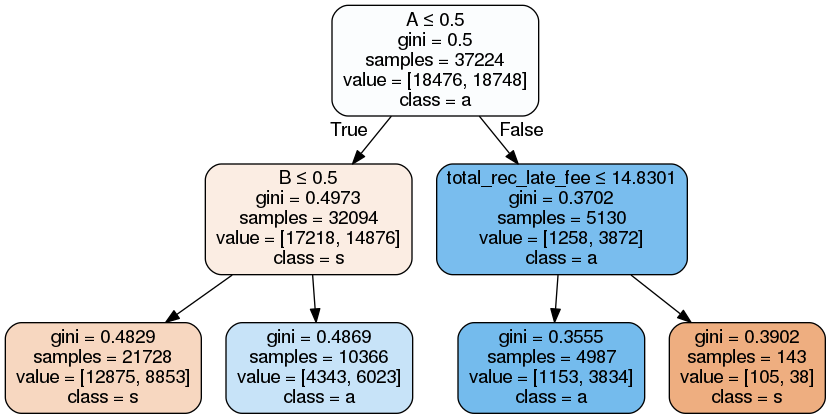

In [62]:
import pydotplus
from IPython.display import Image
dot_data = tree.export_graphviz(small_model,out_file=None,feature_names=features,
                               class_names = target,
                               filled = True,
                               rounded = True,
                               special_characters = True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# small model

In [66]:
validation_safe_loans = data_validation[data_validation[target] ==1]
validation_risky_loans = data_validation[data_validation[target] == -1]

sample_validation_data_safe = validation_safe_loans[0:2]
sample_validation_data_risky = validation_risky_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)

sample_validation_data

,grade,sub_grade,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,...,wedding,debt_consolidation,home_improvement,major_purchase,medical,moving,vacation,house,36 months,60 months
19,B,B3,0,11,OWN,11.18,credit_card,36 months,1,1,...,0,0,0,0,0,0,0,0,1,0
79,D,D1,0,10,RENT,16.85,debt_consolidation,36 months,1,1,...,0,1,0,0,0,0,0,0,1,0
24,D,D2,0,3,RENT,13.97,other,60 months,0,1,...,0,0,0,0,0,0,0,0,0,1
41,A,A5,0,11,MORTGAGE,16.33,debt_consolidation,36 months,1,1,...,0,1,0,0,0,0,0,0,1,0


In [67]:
feature_matrix_sample_validation,target_matrix_sample_validation = get_numpy_data(sample_validation_data,features,target)

In [68]:
sample_validation_data['prediction'] = decision_tree_model.predict(feature_matrix_sample_validation)

In [72]:
accurate_sample_validation = sample_validation_data[sample_validation_data[target] == sample_validation_data['prediction']]
accuracy = len(accurate_sample_validation)/float(len(sample_validation_data))
print "Accuracy on sample validation data is : ",accuracy

Accuracy on sample validation data is :  0.5


# Accuracy on sample validation data is :  0.5

In [78]:
predicted_probability = decision_tree_model.predict_proba(feature_matrix_sample_validation)
print predicted_probability
print sample_validation_data['prediction']

[[ 0.34156543  0.65843457]
 [ 0.53630646  0.46369354]
 [ 0.64750958  0.35249042]
 [ 0.20789474  0.79210526]]
19    1
79   -1
24   -1
41    1
Name: prediction, dtype: int64


# last loan is the safest loan

# Yes everything that has p > 0.5 is predicted as 1

In [79]:
predicted_probability_small = small_model.predict_proba(feature_matrix_sample_validation)
print predicted_probability_small
print sample_validation_data['prediction']

[[ 0.41896585  0.58103415]
 [ 0.59255339  0.40744661]
 [ 0.59255339  0.40744661]
 [ 0.23120112  0.76879888]]
19    1
79   -1
24   -1
41    1
Name: prediction, dtype: int64


In [86]:
sample_validation_data[features][0:1]


,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,B,C,A,...,wedding,debt_consolidation,home_improvement,major_purchase,medical,moving,vacation,house,36 months,60 months
19,0,11,11.18,1,1,82.4,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# small tree predicts it to be of class "a"

In [87]:
feature_matrix_validation,target_matrix_validation = get_numpy_data(data_validation,features,target)

In [88]:
data_train['prediction_small'] = small_model.predict(feature_matrix_train)
data_train['prediction_decision_model'] = decision_tree_model.predict(feature_matrix_train)

/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [89]:
accurate_small = data_train[data_train[target] == data_train['prediction_small']]
accurate_decision_model = data_train[data_train[target] == data_train['prediction_decision_model']]
print "Accuracy on train data by small model : ",len(accurate_small)/float(len(data_train))
print "Accuracy on train data by Decision model : ",len(accurate_decision_model)/float(len(data_train))

Accuracy on train data by small model :  0.613502041694
Accuracy on train data by Decision model :  0.640527616591


# Accuracy on train data by small model :  0.613502041694

# Accuracy on train data by Decision model :  0.640527616591

In [93]:
print "Accuracy on validation data by small model : ",small_model.score(feature_matrix_validation,
                                                                 target_matrix_validation)
print "Accuracy on validation data by Decision model : ",decision_tree_model.score(feature_matrix_validation,
                                                                            target_matrix_validation)

Accuracy on validation data by small model :  0.619345109866
Accuracy on validation data by Decision model :  0.636148211978


# Accuracy on validation data by small model :  0.619345109866

# Accuracy on validation data by Decision model :  0.636148211978

In [94]:
big_model = tree.DecisionTreeClassifier(max_depth=10)
big_model.fit(feature_matrix_train,target_matrix_train)
print "Accuracy of big_model on train data : ",big_model.score(feature_matrix_train,target_matrix_train)
print "Accuracy of big_model on validation data : ",big_model.score(feature_matrix_validation,target_matrix_validation)

Accuracy of big_model on train data :  0.66379217709
Accuracy of big_model on validation data :  0.626561826799


# Accuracy of big_model on train data :  0.66379217709

# Accuracy of big_model on validation data :  0.626561826799

In [102]:
data_validation['prediction_decision'] = decision_tree_model.predict(feature_matrix_validation)
false_negative = data_validation[(data_validation[target] == 1) & (data_validation['prediction_decision'] == -1)]
false_positive = data_validation[(data_validation[target] == -1) & (data_validation['prediction_decision'] == 1)]
print "False Positive : ",len(false_positive)
print "False Negative : ",len(false_negative)
print "Correct prediction : ",len(data_validation) - len(false_negative) - len(false_positive)

False Positive :  1661
False Negative :  1717
Correct prediction :  5906


/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [107]:
total_cost_of_mistake = 1661*10000 + 1717*20000
print "total_cost_of_mistake : ",total_cost_of_mistake

total_cost_of_mistake :  50950000


# total_cost_of_mistake :  50950000

In [105]:
small_model.classes_

array([-1,  1])